In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyfits
import glob
import scipy.stats
import math

In [2]:
nldata = np.loadtxt ("/mnt/odiscratch/dharbeck/nonlinear201612/nonlin/nonlin.data", unpack = True)
col_ota = 0
col_cellx=3
col_celly=4
col_exptime = 5
col_medlevel = 7
col_stdlevl = 9
col_jd = 10

TexpReference=10

In [3]:
def plotbycell (ota, cellx, celly, texp, ax):
    selection = (nldata[col_ota] == ota) & (nldata[col_cellx] == cellx) & (nldata[col_celly] == celly) \
        & (nldata[col_exptime] == texp)
    constlevels = nldata [col_medlevel] [ selection]
    constjd = nldata[col_jd] [selection]
    
  
    ax.plot (constjd, constlevels / np.mean (constlevels))
    
    
def plotbyota (ota, texp, ax):
    for xx in range (0,8):
        for yy in range (0,8):
            plotbycell (ota, xx, yy, texp, ax)
            ax.set_ylim ([0.98,1.02])
            ax.set_title ("Level for Texp = %s, OTA %s" % (texp, ota))
    #ax.title ("Level for Texp = %s, OTA %s" % (texp, ota))
            ax.set_xlabel ("JD")
            ax.set_ylabel ("Relative median Level [ADU]")
   
   

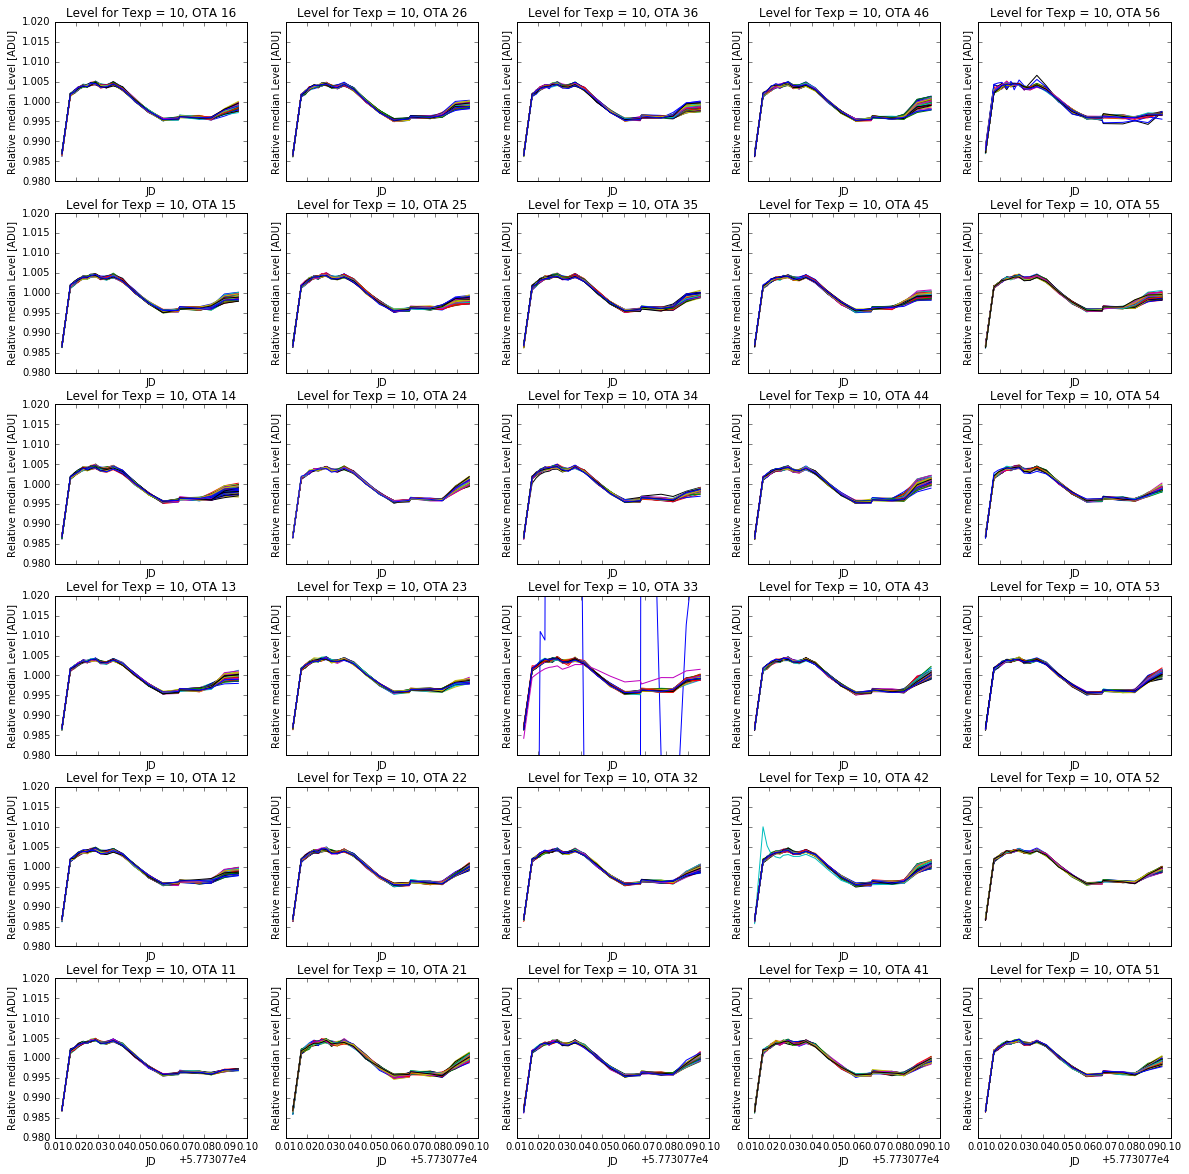

In [4]:

f, axes = plt.subplots (6,5, figsize=(20,20), sharex='col', sharey='row')

for xx in range (1,6):
    for yy in range (1,7):
      
        ota = yy + xx * 10
        plotbyota (ota,TexpReference, axes[5-(yy-1),xx-1])

plt.show
plt.savefig ("ReferenceLampStability.png")